In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
import sklearn as sk
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow import keras

/tmp/ipykernel_4188/2793230352.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Read the dataset csv file
df = pd.read_csv("bashkam final.csv")
df.head()

,Country,Outside Dry-Bulb Temperature,Outside Dew-Point Temperature,Direct Normal Solar,Diffuse Horizontal Solar,Wind Speed,Wind Direction,Atmospheric Pressure,RES
0,AACHEN,15.316670,13.625000,0.013,1.736,2.925000,272.91670,100816.70,2
1,AB - BROOKS,19.833330,9.408334,0.385,5.101,2.670833,74.58334,93843.34,4
2,AK - AMBLER,9.162500,7.687500,0.192,2.189,2.370833,195.41670,100300.00,1
3,AK - ANAKTUVUK PASS,4.420834,-0.266667,0.000,2.015,3.545833,96.66666,93700.00,1
4,AK - ANCHORAGE LAKEHOOD,14.858330,9.525000,3.276,2.571,0.895833,114.58330,101000.00,3


In [3]:
# Drop the Country column it's useless
df = df.drop(columns=['Country'])
df.head()

,Outside Dry-Bulb Temperature,Outside Dew-Point Temperature,Direct Normal Solar,Diffuse Horizontal Solar,Wind Speed,Wind Direction,Atmospheric Pressure,RES
0,15.316670,13.625000,0.013,1.736,2.925000,272.91670,100816.70,2
1,19.833330,9.408334,0.385,5.101,2.670833,74.58334,93843.34,4
2,9.162500,7.687500,0.192,2.189,2.370833,195.41670,100300.00,1
3,4.420834,-0.266667,0.000,2.015,3.545833,96.66666,93700.00,1
4,14.858330,9.525000,3.276,2.571,0.895833,114.58330,101000.00,3


In [4]:
# The RES column is our labels, so let's extract them into a variable
y = df['RES'].values

In [5]:
# Now that we have extracted the RES column, we can now delete it from the feature dataset
df = df.drop(columns=['RES'])
df.head()

,Outside Dry-Bulb Temperature,Outside Dew-Point Temperature,Direct Normal Solar,Diffuse Horizontal Solar,Wind Speed,Wind Direction,Atmospheric Pressure
0,15.316670,13.625000,0.013,1.736,2.925000,272.91670,100816.70
1,19.833330,9.408334,0.385,5.101,2.670833,74.58334,93843.34
2,9.162500,7.687500,0.192,2.189,2.370833,195.41670,100300.00
3,4.420834,-0.266667,0.000,2.015,3.545833,96.66666,93700.00
4,14.858330,9.525000,3.276,2.571,0.895833,114.58330,101000.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Frequency')

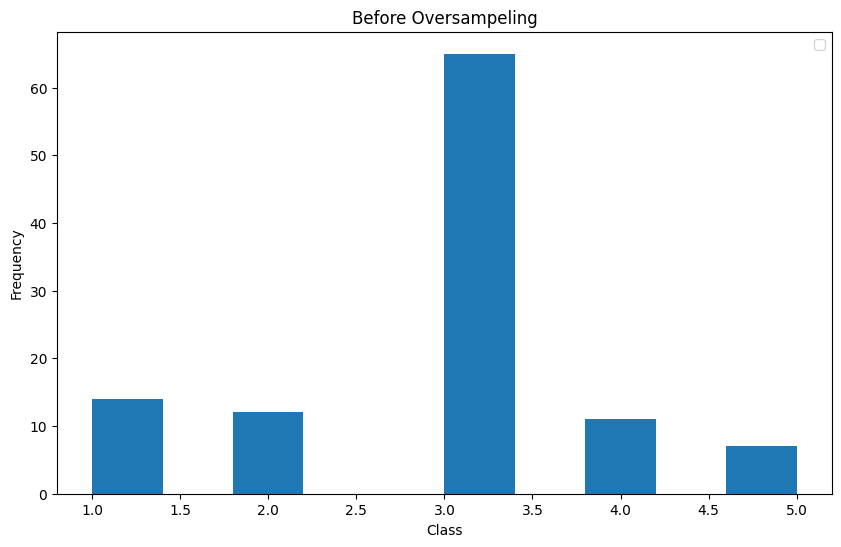

In [6]:
# Our data is so unbalenced, so we have to balenced them with oversampling
plt.figure(figsize=(10,6))
plt.hist(y)
plt.legend()
plt.title('Before Oversampeling')

plt.xlabel('Class')
plt.ylabel('Frequency')

In [7]:
# Before oversampling, let's normalize our data to improve the machine learning and deep learning results
scaler = StandardScaler()
df.iloc[:,0:]=scaler.fit_transform(df.iloc[:,0:].to_numpy())
df.head()

,Outside Dry-Bulb Temperature,Outside Dew-Point Temperature,Direct Normal Solar,Diffuse Horizontal Solar,Wind Speed,Wind Direction,Atmospheric Pressure
0,-0.838557,0.049435,-1.291204,-0.901978,-0.164086,1.551777,0.694759
1,-0.180351,-0.630757,-1.177632,3.339565,-0.342414,-1.250038,-0.585026
2,-1.735396,-0.908345,-1.236555,-0.330976,-0.552900,0.456950,0.599932
3,-2.426392,-2.191435,-1.295173,-0.550301,0.271501,-0.938071,-0.611333
4,-0.905350,-0.611937,-0.295005,0.150530,-1.587786,-0.684966,0.728399


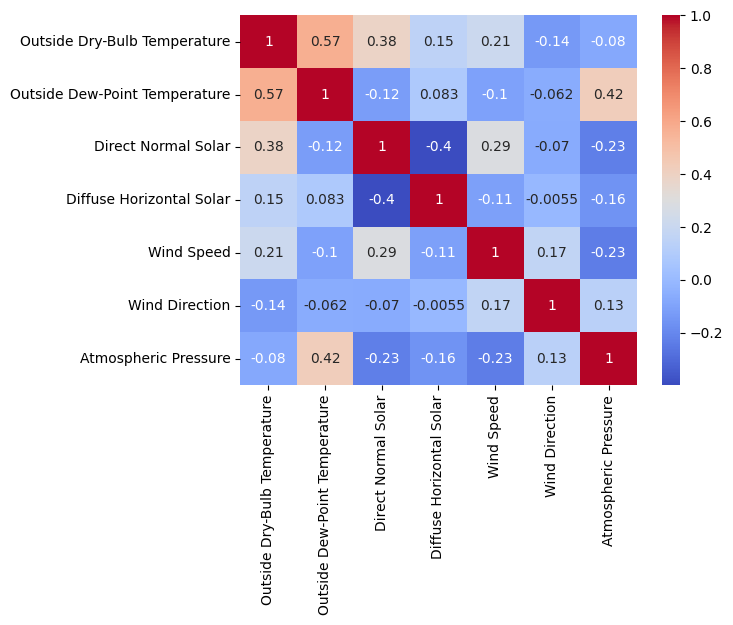

In [8]:
# Let's check the correlation in our dataset
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [9]:
# Now extract all features from our dataset to train our machine learning and deep learning model
X = df[['Outside Dry-Bulb Temperature', 'Outside Dew-Point Temperature',
       'Direct Normal Solar', 'Diffuse Horizontal Solar', 'Wind Speed',
       'Wind Direction', 'Atmospheric Pressure']].values

In [10]:
# Show the number of values of each class before applying the SMOTE sampling
print("Number of values of each class before SMOTE:", Counter(y))

# Define a SMOTE object
smote = SMOTE(sampling_strategy='auto',random_state=42)

# Apply the SMOTE Algorithm into our data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Show the number of values of each class after SMOTE sampling
print("Number of values of each class after SMOTE:", Counter(y_resampled))

Number of values of each class before SMOTE: Counter({3: 65, 1: 14, 2: 12, 4: 11, 5: 7})
Number of values of each class after SMOTE: Counter({2: 65, 4: 65, 1: 65, 3: 65, 5: 65})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Frequency')

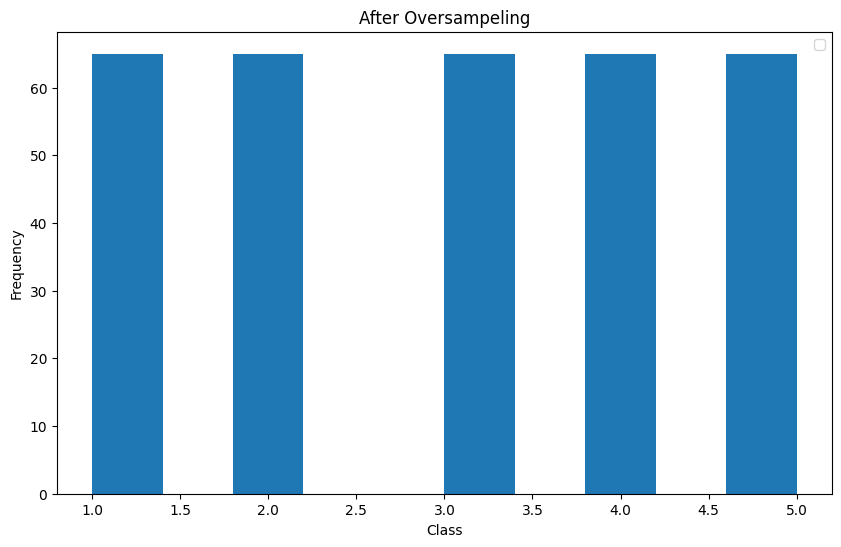

In [11]:
plt.figure(figsize=(10,6))
plt.hist(y_resampled)
plt.legend()
plt.title('After Oversampeling')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [12]:
# To train our dataset into the deep neural network model, at first we have to convert our dataset into categorical dataset
print("Before encoding our dataset labels")
print(y, '\n')

categorical_y = tf.keras.utils.to_categorical(y_resampled - 1)

print("After encoding our dataset labels")
print(categorical_y)

Before encoding our dataset labels
[2 4 1 1 3 1 3 1 1 5 3 3 3 3 3 5 3 1 3 3 3 3 3 3 1 1 3 1 4 2 4 2 3 2 1 3 3
 3 3 4 3 3 3 3 3 3 3 3 1 2 3 3 2 5 3 3 3 3 1 3 3 3 2 4 3 2 5 3 4 4 3 3 3 3
 3 2 3 3 3 3 3 1 4 5 3 3 2 3 3 3 2 3 3 3 3 5 1 3 3 3 3 2 3 3 5 4 4 4 3] 

After encoding our dataset labels
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [13]:
# Split our categorical dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, categorical_y, test_size=0.2, random_state=42)

In [25]:
# Build our deep neural network model
model = keras.Sequential([
    keras.layers.Dense(5, activation='PReLU', input_shape=(7,)),
    keras.layers.Dense(10, activation='PReLU'),
    keras.layers.Dense(64, activation='PReLU'),
    keras.layers.Dense(128, activation='PReLU'),
    keras.layers.Dense(256, activation='PReLU'),
    keras.layers.Dense(128, activation='PReLU'),
    keras.layers.Dense(10, activation='PReLU'),
    keras.layers.Dense(5, activation='softmax')
])

# Now it's time for compile our nn model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 5)                 45        
                                                                 
 dense_18 (Dense)            (None, 10)                70        
                                                                 
 dense_19 (Dense)            (None, 64)                768       
                                                                 
 dense_20 (Dense)            (None, 128)               8448      
                                                                 
 dense_21 (Dense)            (None, 256)               33280     
                                                                 
 dense_22 (Dense)            (None, 128)               33024     
                                                                 
 dense_23 (Dense)            (None, 10)               

In [26]:
# Let's train our model with 100 epochs
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.3, shuffle=True)

Epoch 1/200
6/6 [==============================] - 1s 24ms/step - loss: 1.5900 - accuracy: 0.2857 - val_loss: 1.5368 - val_accuracy: 0.2949
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 1.5168 - accuracy: 0.4121 - val_loss: 1.5071 - val_accuracy: 0.3077
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 1.4701 - accuracy: 0.4231 - val_loss: 1.4968 - val_accuracy: 0.3333
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 1.4186 - accuracy: 0.4505 - val_loss: 1.4773 - val_accuracy: 0.3333
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 1.3466 - accuracy: 0.4725 - val_loss: 1.4361 - val_accuracy: 0.3846
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 1.2734 - accuracy: 0.5220 - val_loss: 1.4086 - val_accuracy: 0.4615
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 1.1861 - accuracy: 0.5275 - val_loss: 1.4038 - val_accuracy: 0.4615
Epoch 8/200
6/6 [=========

6/6 [==============================] - 0s 5ms/step - loss: 0.4770 - accuracy: 0.7857 - val_loss: 1.7972 - val_accuracy: 0.5769
Epoch 60/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4688 - accuracy: 0.8297 - val_loss: 1.7172 - val_accuracy: 0.5641
Epoch 61/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4882 - accuracy: 0.7912 - val_loss: 1.8993 - val_accuracy: 0.6154
Epoch 62/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4513 - accuracy: 0.8132 - val_loss: 1.8144 - val_accuracy: 0.5769
Epoch 63/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4693 - accuracy: 0.8022 - val_loss: 1.8726 - val_accuracy: 0.6410
Epoch 64/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4168 - accuracy: 0.8681 - val_loss: 1.6563 - val_accuracy: 0.6154
Epoch 65/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4297 - accuracy: 0.8242 - val_loss: 1.9159 - val_accuracy: 0.6410
Epoch 66/200
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.9176 - val_loss: 1.9829 - val_accuracy: 0.6795
Epoch 118/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.9066 - val_loss: 2.0839 - val_accuracy: 0.6667
Epoch 119/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.8846 - val_loss: 1.9432 - val_accuracy: 0.6154
Epoch 120/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2391 - accuracy: 0.9121 - val_loss: 2.1303 - val_accuracy: 0.6667
Epoch 121/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2523 - accuracy: 0.9066 - val_loss: 1.9510 - val_accuracy: 0.6795
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.9176 - val_loss: 2.1145 - val_accuracy: 0.6795
Epoch 123/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2459 - accuracy: 0.9121 - val_loss: 2.0780 - val_accuracy: 0.6667
Epoch 124/200
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1504 - accuracy: 0.9286 - val_loss: 2.5870 - val_accuracy: 0.6795
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1539 - accuracy: 0.9451 - val_loss: 2.5590 - val_accuracy: 0.7051
Epoch 177/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1531 - accuracy: 0.9396 - val_loss: 2.5424 - val_accuracy: 0.6923
Epoch 178/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1508 - accuracy: 0.9341 - val_loss: 2.5476 - val_accuracy: 0.6923
Epoch 179/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1760 - accuracy: 0.9341 - val_loss: 2.5766 - val_accuracy: 0.7179
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1545 - accuracy: 0.9286 - val_loss: 2.7258 - val_accuracy: 0.6667
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1442 - accuracy: 0.9341 - val_loss: 2.6695 - val_accuracy: 0.7051
Epoch 182/200
6/6 [========

In [27]:
# Final evaluation of the model:
scores = model.evaluate(X_test, y_test - 1, verbose=1)
print(f'Test accuracy: {scores[1]}')

3/3 [==============================] - 0s 2ms/step - loss: -68.7335 - accuracy: 0.8308
Test accuracy: 0.8307692408561707


In [28]:
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

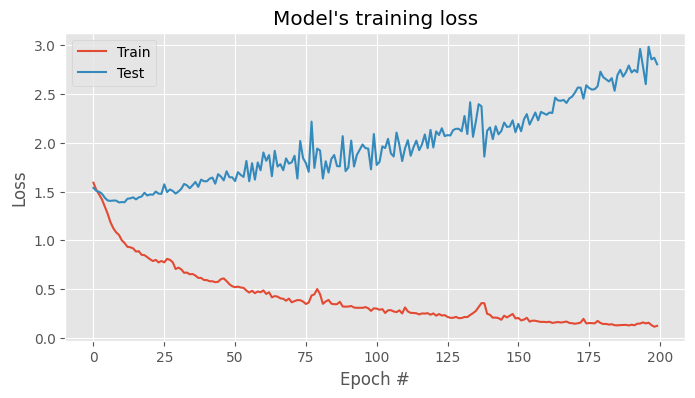

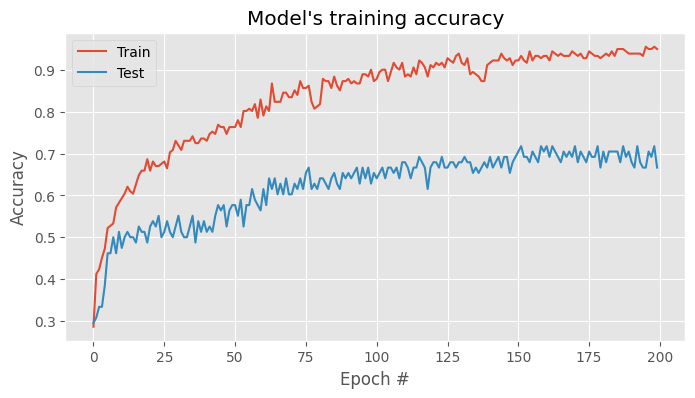

In [29]:
# Let's take a look at our model perfomance
plot_loss(history)
plot_accuracy(history)

3/3 [==============================] - 0s 1ms/step


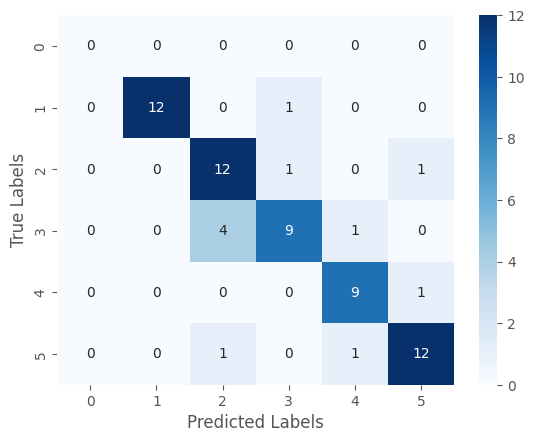

In [31]:
y_pred = model.predict(X_test)

y_test_real = []
y_pred_real = []

for i in range(len(y_test)):
  y_test_real.append(np.argmax(y_test[i]) + 1)
  y_pred_real.append(np.argmax(y_pred[i]) + 1)
    
# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test_real, y_pred_real)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [32]:
NN_Confusion_Matrix_table = PrettyTable(['metrices', 'values'])

# To insert rows:
NN_Confusion_Matrix_table.add_row(['Precision', sk.metrics.precision_score(y_test_real, y_pred_real, average='weighted')])
NN_Confusion_Matrix_table.add_row(['Recall', sk.metrics.recall_score(y_test_real, y_pred_real, average='weighted')])
NN_Confusion_Matrix_table.add_row(['f1_score', sk.metrics.f1_score(y_test_real, y_pred_real, average='weighted')])

print(NN_Confusion_Matrix_table)

+-----------+--------------------+
|  metrices |       values       |
+-----------+--------------------+
| Precision | 0.8387494858083093 |
|   Recall  | 0.8307692307692308 |
|  f1_score | 0.8303098192130451 |
+-----------+--------------------+
